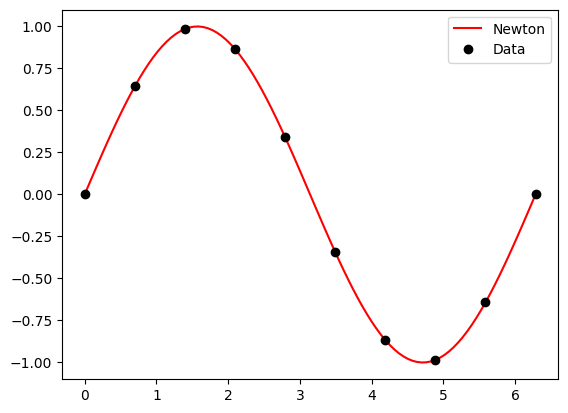

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def newton_interpolation(x: list[float], y: list[float], xi: float) -> float:
    n = len(x)
    # Hitung koefisien beda yang dibutuhkan
    # beda f_0, f_1, ... , f_n-1
    f = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        f[i][0] = y[i]
    for j in range(1, n):
        for i in range(n - j):
            f[i][j] = (f[i + 1][j - 1] - f[i][j - 1]) / (x[i + j] - x[i])
    # Hitung nilai f(x)
    fx = f[0][0]
    for j in range(1, n):
        term = 1
        for i in range(j):
            term *= (xi - x[i])
        fx += f[0][j] * term
    return fx

# Data yang akan diinterpolasi
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)

# Buat kurva untuk plot
x_interp = np.linspace(0, 2*np.pi, 100)
y_interp_newton = [newton_interpolation(x, y, xi) for xi in x_interp]

# Plot hasil interpolasi
plt.plot(x_interp, y_interp_newton, label='Newton', color='red')
plt.plot(x, y, 'o', label='Data', color='black')
plt.legend()
plt.show()